## Task 1: Exploratory Data Analysis (EDA):
    1.	Load the dataset and perform basic data exploration.
    2.	Examine the distribution of features using histograms, box plots, or density plots.
    3.	Investigate correlations between features to understand relationships within the data.


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [99]:
df=pd.read_csv('wine.csv')

In [100]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [101]:
df['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [102]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [103]:
df.duplicated().sum()

np.int64(0)

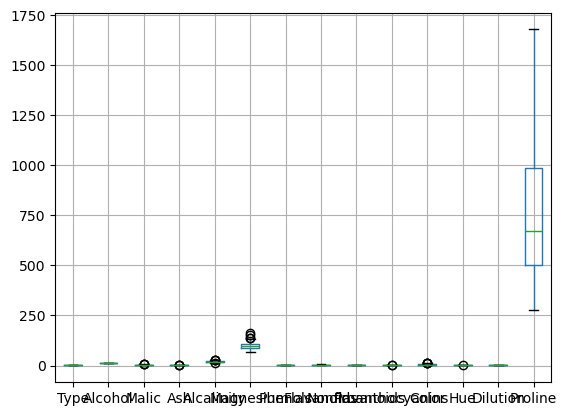

In [104]:
df.boxplot()
plt.show()

In [105]:
def outliercapping(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower=q1 - 1.5*IQR
    upper=q3 + 1.5*IQR
    df[col]=df[col].apply(lambda x:upper if x > upper else lower if x < lower else x)
for col in df.select_dtypes(['int','float']).columns:
    outliercapping(df,col)

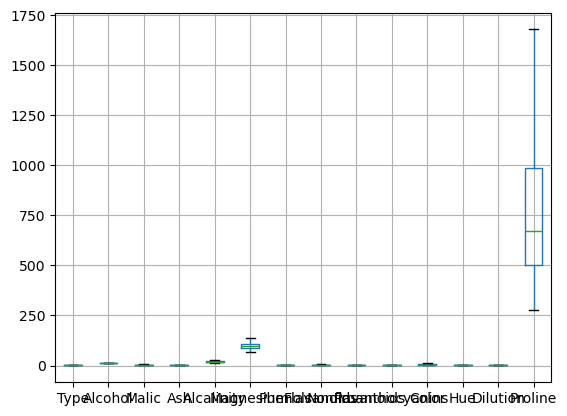

In [106]:
df.boxplot()
plt.show()

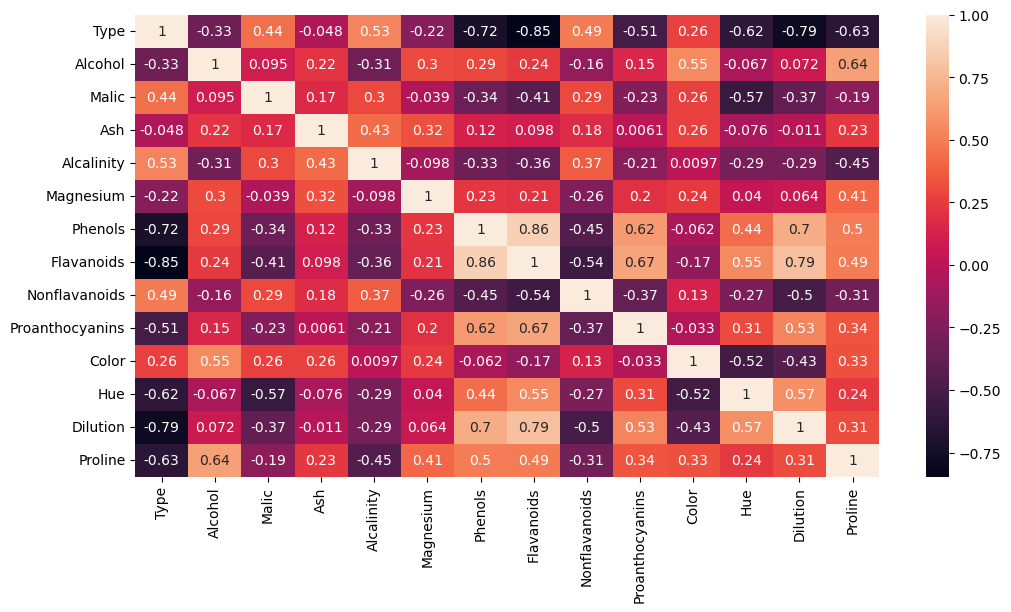

In [107]:
corr=df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr,annot=True)
plt.show()

## Task 2: Dimensionality Reduction with PCA:
    1. Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
    2. Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
    3. Transform the original dataset into the principal components.


In [108]:
features=df.drop(columns='Type')
features.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [109]:
target=df[['Type']]
target.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [110]:
std=StandardScaler()
df1=pd.DataFrame(std.fit_transform(features),columns=features.columns)
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


In [111]:
pca=PCA(n_components=5)
pca.fit(features)

PCA(n_components=5)

In [112]:
features_new=pca.transform(features)
features_new

array([[ 3.18560726e+02,  2.18424595e+01, -3.20096671e+00,
         6.95712718e-02, -6.51333269e-01],
       [ 3.03103574e+02, -5.02718660e+00, -6.79533842e+00,
         8.64112917e-01,  5.37575990e-01],
       [ 4.38067659e+02, -6.14360089e+00,  1.14750067e+00,
        -8.71340541e-01, -4.10690532e-01],
       [ 7.33244572e+02,  6.89993106e-01,  9.10873681e-01,
         5.17073806e-01, -9.05903356e-01],
       [-1.15727449e+01,  1.87395074e+01,  5.10340066e-01,
        -1.47765111e+00, -2.75453515e-01],
       [ 7.03235769e+02,  1.46978904e-01, -9.43345138e-01,
         3.42784800e-01, -1.60565999e-01],
       [ 5.42980278e+02, -1.30977504e+01, -2.06544642e+00,
         2.53655901e-02,  4.91349700e-01],
       [ 5.48402707e+02,  1.18710473e+01, -5.16260580e-02,
        -1.41758593e+00,  8.92324271e-01],
       [ 2.98043914e+02, -7.83357456e+00, -3.84997414e+00,
         9.37937478e-01, -3.18542539e-01],
       [ 2.98056305e+02, -6.74078152e+00, -1.55267431e+00,
         1.68480698e+00

## Task 3: Clustering with Original Data:
    1.Apply a clustering algorithm (e.g., K-means) to the original dataset.
    2.Visualize the clustering results using appropriate plots.
    3.Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [121]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(features)

KMeans(n_clusters=4)

In [122]:
kmeans.cluster_centers_

array([[1.25119118e+01, 2.47698529e+00, 2.28643382e+00, 2.07625000e+01,
        9.22205882e+01, 2.06705882e+00, 1.77544118e+00, 3.88088235e-01,
        1.45279412e+00, 4.07279410e+00, 9.40680147e-01, 2.49573529e+00,
        4.56294118e+02],
       [1.36740000e+01, 1.94566667e+00, 2.38300000e+00, 1.70983333e+01,
        1.05500000e+02, 2.82500000e+00, 2.94200000e+00, 2.81666667e-01,
        1.94133333e+00, 5.12566667e+00, 1.05966667e+00, 3.18966667e+00,
        1.05756667e+03],
       [1.29111667e+01, 2.54387500e+00, 2.40597917e+00, 1.99716667e+01,
        1.02316667e+02, 2.08433333e+00, 1.50983333e+00, 3.94333333e-01,
        1.45200000e+00, 5.66033333e+00, 8.70766667e-01, 2.32183333e+00,
        7.16250000e+02],
       [1.39205000e+01, 1.76900000e+00, 2.49750000e+00, 1.72000000e+01,
        1.06650000e+02, 2.90800000e+00, 3.08150000e+00, 2.95500000e-01,
        1.90850000e+00, 6.32250000e+00, 1.11700000e+00, 3.00850000e+00,
        1.36085000e+03]])

In [123]:
df['cluster']=kmeans.labels_
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [124]:
silhouette_score(features,kmeans.labels_)

np.float64(0.5676108460455683)

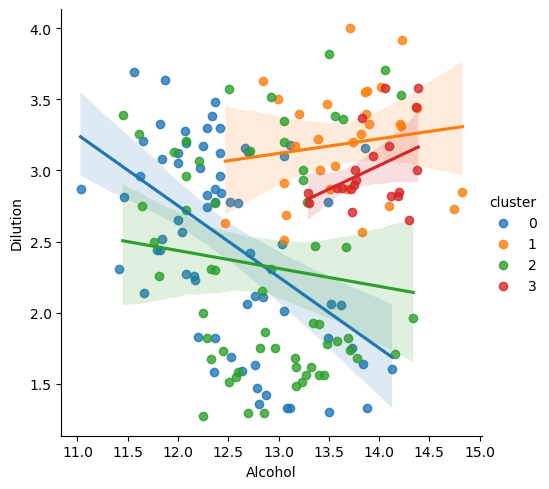

In [125]:
sns.lmplot(x="Alcohol", y="Dilution", data=df,hue='cluster')
plt.show()

## Task 4: Clustering with PCA Data:
    1.Apply the same clustering algorithm to the PCA-transformed dataset.
    2.Visualize the clustering results obtained from PCA-transformed data.
    3.Compare the clustering results from PCA-transformed data with those from the original dataset.


In [132]:
kmeans_pca=KMeans(n_clusters=2)
kmeans_pca.fit(features_new)

KMeans(n_clusters=2)

In [135]:
kmeans.labels_

array([1, 1, 1, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 2, 2,
       1, 1, 2, 2, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [136]:
silhouette_score(features_new,kmeans_pca.labels_)

np.float64(0.6571843118873445)

In [137]:
features_new=pd.DataFrame(features_new,columns=['1','2','3','4','5'])
features_new['cluster']=kmeans_pca.labels_
features_new

,1,2,3,4,5,cluster
0,318.560726,21.842460,-3.200967,0.069571,-0.651333,0
1,303.103574,-5.027187,-6.795338,0.864113,0.537576,0
2,438.067659,-6.143601,1.147501,-0.871341,-0.410691,0
3,733.244572,0.689993,0.910874,0.517074,-0.905903,0
4,-11.572745,18.739507,0.510340,-1.477651,-0.275454,1
...,...,...,...,...,...,...
173,-6.973940,-4.255365,2.460323,3.198169,1.985815,1
174,3.135442,2.619247,4.317928,1.607070,1.080286,1
175,88.456836,19.101796,2.165014,4.732733,0.946644,1
176,93.454990,18.987543,1.718160,3.603762,0.247788,1


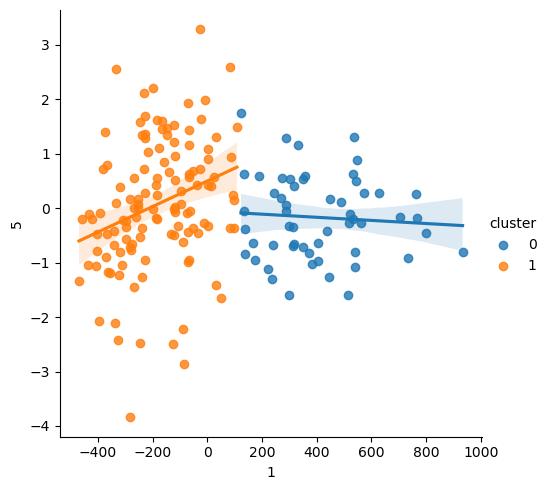

In [138]:
sns.lmplot(x='1', y='5', data=features_new,hue='cluster')
plt.show()

###### Task 5: Comparison and Analysis:

    1.Compare the clustering results obtained from the original dataset and PCA-transformed data.
    
              The silhotte score of Orginal and Pca are 0.56 and 0.65
            
    2.Discuss any similarities or differences observed in the clustering results.

              The main differnce is that in pca the clusteres are more clean and accurate while in orginal the points are distributed across the graph
              
    3.Reflect on the impact of dimensionality reduction on clustering performance.

              The impact of pca is that the inertia of the model becomes less when compared to the original data and provides a better visualization
              
    4.Analyze the trade-offs between using PCA and clustering directly on the original dataset.

              Orginal:
                     Harder to visualize 
                     uses all data
              PCA:
                     Easier to visualize
                     some data will be lost
                  

## Task 6: Conclusion and Insights
    1.Summarize the key findings and insights from the assignment.
    
          Clustering on original data with large dimension may struggle to visualize.
          
    2.Discuss the practical implications of using PCA and clustering in data analysis.

              In high dimensional data PCA is beneficial while in Low dimension PCA may not require.
    
    3.Provide recommendations for when to use each technique based on the analysis conducted.

               Use orginal data directly if the dimension is less . Use PCA if the dimension of the data is large and need faster computation